In [1]:
#import libraries
import numpy as np
import pandas as pd
import networkx as nx
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [2]:
%matplotlib inline
import seaborn
plt.style.use('seaborn')#switch to seaborn style# TODO
seaborn.set_style(style='white')

In [415]:
tracks = pd.read_csv('data/tracks.csv', index_col=0, header=[0, 1]);
#load and normalize features
features_init= pd.read_csv('data/features.csv', index_col=0, header=[0, 1, 2])

genres=pd.read_csv('data/genres.csv', index_col=0, header=[0])


In [457]:
# Keep only the genre for each track
label=pd.DataFrame({('label','genre','main'): tracks['track']['genre_top'],
                    ('label','genre','sub'): tracks['track']['genres']})

# Keep on the tracks from small subset
label = label[tracks['set','subset'] == 'small']

# Keep only the genres we want
genre_list = ['Rock','Folk','Hip-Hop']#['Hip-Hop', 'Folk',Rock','Jazz','Classical','Pop','Electronic']
label = label[label['label']['genre']['main'].isin(genre_list)]

#add sub genres
genres_dict=genres['title'].to_dict()
genres_dict={str(key):genres_dict[key] for key in genres_dict}

label['label']['genre']['sub']=label['label']['genre']['sub'].str.replace('[^0-9| ]','').str.split(' ').apply(lambda x:'|'.join([genres_dict[k] for k in x ]))

dfmax=abs(features_init).max()
features=features_init.divide(dfmax)

# Merging
dataSet = features.merge(label, left_index=True, right_on='track_id')
#dataSet=dataSet.sort_values([('label', 'genre','main')])


In [458]:
#add custom song
# print(sum(dataSet.label.genre.main=='Rock'))
# label.label.genre.main.unique()
myfeatures = pd.read_csv('./data/custom_features.csv', index_col=0, header=[0, 1,2]);

myfeatures=myfeatures.divide(dfmax)

features=features.append(myfeatures)

mylabel=pd.DataFrame({('label','genre','main'): ['my fckin song'],
                    ('label','genre','sub'):  ['my fckin song']})
mylabel=mylabel.set_index([[-1]])
mylabel.index.name='track_id'
mydataSet = myfeatures.merge(mylabel, left_index=True, right_on='track_id')

dataSet=dataSet.append(mydataSet)

label=label.append(mylabel)

In [459]:
#we calculate the distances of our dataset
distances = pdist(dataSet.drop(columns='label',level=0).values, metric='euclidean')

In [460]:
#We calculate the weights of our adjacency matrix
kernel_width = distances.mean()
weights = np.exp(-distances**2 / kernel_width**2)
adjacency_full = squareform(weights)

In [461]:
# np.save("data/adjacency_HRJC.npy",adjacency_full)
# print(myfeatures)
dataSet.drop(columns='label',level=0)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
 2            0.000812  0.001826  0.000140  0.000317  0.000465  0.000189   
 5            0.000060 -0.000027 -0.000157  0.000161  0.000608  0.000313   
 140          0.000060 -0.000218 -0.000611 -0.000254 -0.000240 -0.000026   
 141          0.000020 -0.000099 -0.000658 -0.000250 -0.000222 -0.000252   
 182          0.000034  0.000376 -0.000262  0.000034 -0.000098  0.000406   
 190         -0.000037 -0.000297 -0.000467 -0.000190 -0.000369 -0.000236   
 193         -0.000035 -0.000368 -0.000058 -0.000150 -0.000254 -0.000218   
 194         -0.000091 -0.000051 -0.000632 -0.000244 -0.000387 -0.000356   
 197         -0.000120 -0.000399 -0.000065 -0.000264 -0.000250 -0.000289   
 200         -0.000138  0.000302 -0.000791  0.000561 -0.000487 -0.000206   
 203         -0.000087 -0.000419 -0.000421 -0.000151 -0.000261 -0.000339   
 204         -0.000108 -0.000045 -0.000239 -0.000112 -0.000136 -0.000086   
 207         -0.000133 -0.000260 -0.000134 -0.000284 -0.000389 -0.000297   
 210         -0.000129 -0.000267 -0.000224 -0.000205  0.000094 -0.000189   
 211         -0.000038 -0.000071 -0.000122 -0.000018  0.000173 -0.000227   
 212          0.000161 -0.000255 -0.000503 -0.000211  0.000409 -0.000208   
 255          0.000013  0.000364  0.000096  0.000028  0.000108  0.000030   
 256          0.000005  0.001845 -0.000196 -0.000051 -0.000174 -0.000115   
 368          0.000139  0.000492  0.000064  0.000916  0.001274  0.001085   
 459          0.000175 -0.000357 -0.000213 -0.000146 -0.000291 -0.000325   
 534         -0.000041 -0.000256  0.000245  0.000020  0.000511 -0.000105   
 540          0.000033 -0.000060  0.000166  0.000041  0.000218  0.000252   
 546          0.000017  0.000145 -0.000043 -0.000051  0.000210  0.000175   
 574          0.000027  0.000253  0.000657 -0.000092  0.001066  0.000076   
 602         -0.000056 -0.000238 -0.000690 -0.000230 -0.000275 -0.000161   
 620          0.000029 -0.000048 -0.000585  0.000023 -0.000263 -0.000250   
 621         -0.000101 -0.000321  0.000709  0.000091  0.000140  0.000067   
 625          0.000007  0.000048  0.000171 -0.000161 -0.000361 -0.000395   
 676         -0.000010 -0.000423 -0.000265 -0.000107 -0.000287  0.000042   
 690         -0.000003  0.000294  0.001029  0.000419  0.000700  0.000171   
...                ...       ...       ...       ...       ...       ...   
 149416       0.000087 -0.000498 -0.000684 -0.000276  0.000168 -0.000017   
 149417       0.000069 -0.000304 -0.000087 -0.000172  0.000260  0.000931   
 149452       0.000075 -0.000253 -0.000138  0.000264 -0.000065 -0.000023   
 149488      -0.000087  0.000096  0.000677  0.000069 -0.000368 -0.000375   
 149523      -0.000032 -0.000167  0.000284 -0.000303 -0.000220 -0.000352   
 149623      -0.000028  0.000158 -0.000123 -0.000138 -0.000051  0.000008   
 149625      -0.000056 -0.000062 -0.000036  0.000053  0.000070  0.000350   
 149626       0.000016 -0.000101  0.000195  0.000033  0.000073 -0.000015   
 149687       0.000040 -0.000234 -0.000211 -0.000104 -0.000278 -0.000140   
 149689      -0.000032 -0.000188  0.000203  0.000207  0.000326  0.000188   
 149690       0.000153  0.000469  0.000392  0.000189  0.000040  0.000121   
 149951       0.000148  0.000336 -0.000193  0.000172  0.000077  0.000036   
 149953      -0.000009  0.000436  0.001017  0.000364  0.000785  0.000536   
 150062      -0.000094 -0.000284 -0.000436  0.000257 -0.000107  0.000031   
 150063      -0.000099 -0.000239 -0.000448 -0.000094 -0.000138 -0.000158   
 150064      -0.000088 -0.000253 -0.000297 -0.000201 -0.000216 -0.000390   
 150287      -0.000059  0.000066  0.000254  0.000148  0.000128  0.000202   
 150288       0.000121  0.000011 -0.000309  0.00

In [494]:
# adjacency_full=np.load("data/adjacency_HRJC.npy")
np.argmax(adjacency_full[-1])
adjacency_full[-1][2101]

df=pd.DataFrame(adjacency_full[-1])
df.sort_values(df.columns[0],ascending=False,inplace=True)
df.nlargest(columns=df.columns[0],n=4)

,0
1710,0.758825
2152,0.721983
2055,0.698084
1754,0.690250


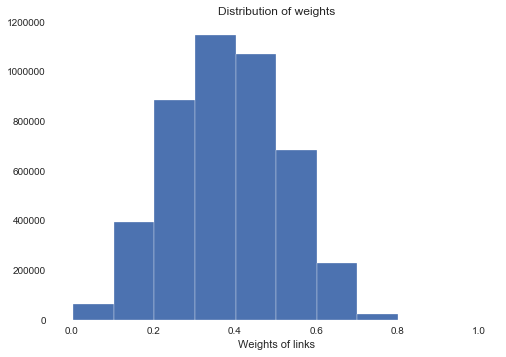

In [462]:
plt.hist(weights)
plt.title('Distribution of weights')
plt.xlabel('Weights of links')
plt.show()

In [468]:
#informatons over connectivity of main component 
adjacency=adjacency_full.copy() #we keep the original adjacency matrix
adjacency[adjacency < 0.65] = 0
graph=nx.from_numpy_matrix(adjacency)
print("#nodes= ",adjacency.shape[0])
print("#compo= ",nx.number_connected_components(graph))
list_comp=sorted(nx.connected_components(graph), key = len, reverse=True)
print("#nodes in giant component= ", len(list_comp[0]))
print("percentage of nodes in main component= ",len(list_comp[0])/adjacency.shape[0])

#nodes=  3001
#compo=  465
#nodes in giant component=  2513
percentage of nodes in main component=  0.8373875374875042


In [464]:
idx_dict={i : dataSet.index[i] for i in range(len(dataSet.index))}
# nx.set_node_attributes(graph, values=idx_dict, name="idx")

label_dict={i : dataSet.label.genre.main.values[i] for i in range(len(dataSet.label.genre.main.values))}
nx.set_node_attributes(graph, values=label_dict, name="genre")

graph=nx.relabel_nodes(graph,idx_dict)
conn_graph_rename.nodes()
graph.node.data()

NodeDataView({2: {'genre': 'Hip-Hop'}, 5: {'genre': 'Hip-Hop'}, 140: {'genre': 'Folk'}, 141: {'genre': 'Folk'}, 182: {'genre': 'Rock'}, 190: {'genre': 'Folk'}, 193: {'genre': 'Folk'}, 194: {'genre': 'Folk'}, 197: {'genre': 'Folk'}, 200: {'genre': 'Folk'}, 203: {'genre': 'Folk'}, 204: {'genre': 'Folk'}, 207: {'genre': 'Folk'}, 210: {'genre': 'Folk'}, 211: {'genre': 'Folk'}, 212: {'genre': 'Folk'}, 255: {'genre': 'Rock'}, 256: {'genre': 'Rock'}, 368: {'genre': 'Rock'}, 459: {'genre': 'Rock'}, 534: {'genre': 'Folk'}, 540: {'genre': 'Folk'}, 546: {'genre': 'Folk'}, 574: {'genre': 'Rock'}, 602: {'genre': 'Folk'}, 620: {'genre': 'Folk'}, 621: {'genre': 'Folk'}, 625: {'genre': 'Folk'}, 676: {'genre': 'Hip-Hop'}, 690: {'genre': 'Rock'}, 694: {'genre': 'Hip-Hop'}, 695: {'genre': 'Hip-Hop'}, 714: {'genre': 'Folk'}, 715: {'genre': 'Folk'}, 716: {'genre': 'Folk'}, 718: {'genre': 'Folk'}, 777: {'genre': 'Rock'}, 814: {'genre': 'Folk'}, 825: {'genre': 'Rock'}, 890: {'genre': 'Folk'}, 892: {'genre': 

In [465]:
list(nx.connected_component_subgraphs(graph))[0].node

NodeView((2, 5, 140, 141, 190, 193, 194, 197, 200, 204, 207, 210, 211, 212, 255, 256, 368, 534, 540, 546, 574, 602, 620, 621, 625, 676, 690, 694, 695, 715, 777, 814, 892, 1039, 1040, 1087, 1102, 1193, 1195, 1196, 1197, 1270, 1417, 1427, 1701, 1702, 1703, 1704, 1720, 1883, 1893, 1925, 1930, 3272, 3273, 3274, 3492, 3598, 3624, 3707, 3708, 3720, 3721, 3722, 3724, 3725, 3762, 3763, 3765, 3766, 3832, 3833, 3840, 3880, 3904, 3905, 3906, 3908, 3909, 3910, 3911, 3912, 3913, 3920, 3921, 3950, 4013, 4022, 4037, 4066, 4067, 4068, 4069, 4108, 4450, 4682, 4684, 4685, 4688, 4777, 4778, 4779, 4780, 4781, 4782, 4784, 4785, 4786, 4787, 4788, 4835, 4836, 4838, 5006, 5156, 5157, 5158, 5159, 5169, 5170, 5171, 5264, 5268, 5376, 5381, 5879, 5936, 5940, 6439, 6440, 6442, 6443, 6448, 6461, 6463, 6467, 6517, 6519, 6603, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6762, 6776, 6778, 6779, 6782, 6788, 6854, 6855, 6856, 6857, 7481, 7482, 7483, 7487, 7488, 7489, 7490, 7491, 7492, 7495, 7709, 7710, 7872, 8056, 8208, 8

In [466]:
#keep only the main component and corresponding label
conn_graph = list(nx.connected_component_subgraphs(graph))[0]
conn_label=label.iloc[list(list_comp[0])]

## Graph plot##

In [147]:
laplacian=nx.laplacian_matrix(conn_graph)

In [467]:
# conn_label.label.genre['sub'].str.split("|",expand=True).iloc[:,0]
conn_graph.node.data()
nx.write_gexf(conn_graph, "data/graph_small_HRF_mysong.gexf")

In [275]:
# conn_label.label.genre['sub'].str.split("|",expand=True).iloc[:,0].unique()

In [150]:

# for i,name in enumerate( conn_label.label.genre['sub'].str.split("|",expand=True).stack().value_counts().to_frame(name='count').reset_index()['index']):
#     label_num[label_num==name]=5*i
#     print(name," ",5*i)
# label_num[label_num>10]=0   
# conn_label.label.genre['sub'].str.split("|",expand=True).iloc[:,0]

In [269]:
label2=np.array(conn_label.label.genre.main)
# label2=np.array(conn_label.label.genre['sub'].str.split("|",expand=True).iloc[:,0]);
label_num=label2.copy()

for i,name in enumerate( conn_label.label.genre.main.unique()):
    label_num[label_num==name]=i
    print(name," ",i)
    
# label_num[label_num=='Rock']=0
# label_num[label_num=='Hip-Hop']=1
# label_num[label_num=='Folk']=4
# label_num[label_num=='Pop']=3
# label_num[label_num=='Experimental']=4
# label_num[label_num=='Electronic']=5
# label_num[label_num=='International']=6
# label_num[label_num=='Instrumental']=7

print(label_num)

Hip-Hop   0
Folk   1
Rock   2
[0 0 1 ... 0 1 0]


In [152]:
e,eigenvectors = scipy.sparse.linalg.eigs(laplacian,k=6)

e=e.real
eigenvectors=eigenvectors.real

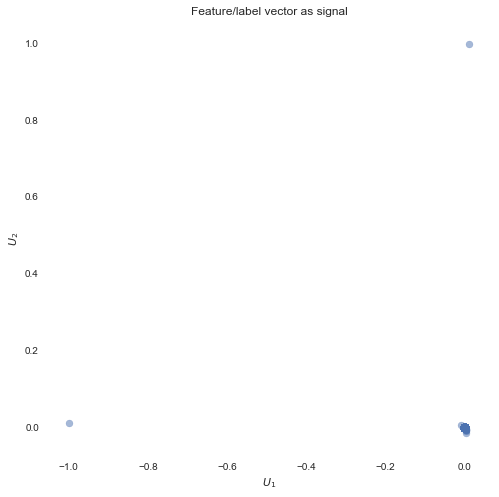

In [153]:
#using laplacian eigenmap
plt.figure(figsize=(8, 8))

plt.scatter(eigenvectors[:, 1], eigenvectors[:, 2], alpha=0.5, cmap='coolwarm')
plt.title('Feature/label vector as signal')
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

In [221]:
#using springlayout
coords = nx.spring_layout(conn_graph)  # Force-directed layout.

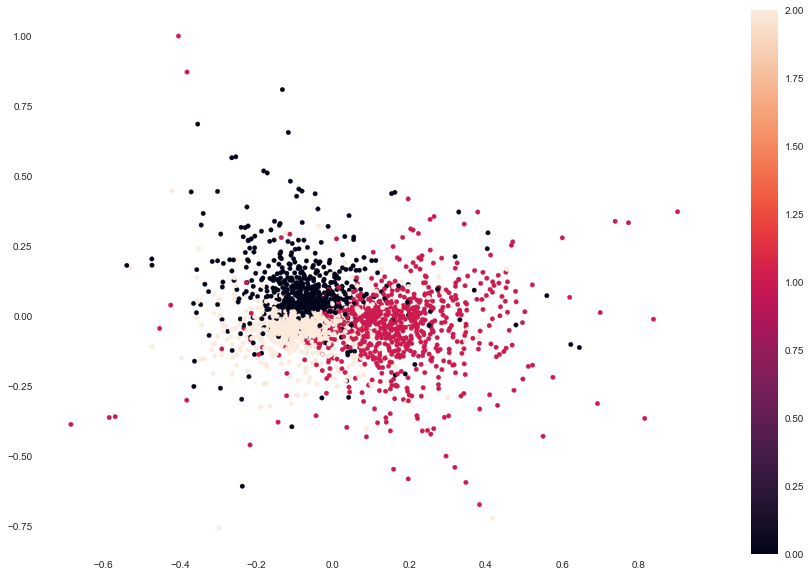

In [222]:
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(conn_graph, coords,node_size=20, node_color=label_num)
# nx.draw_networkx_edges(conn_graph, coords, alpha=0.3)
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=np.min(label_num), vmax=np.max(label_num)))
sm._A = []
plt.colorbar(sm)
plt.show()

In [155]:
i=0
coords_x=[]
coords_y=[]
for i in (conn_graph.node):
    coords_x.append(coords[i][0])
    coords_y.append(coords[i][1]);   
    i+=1;
    

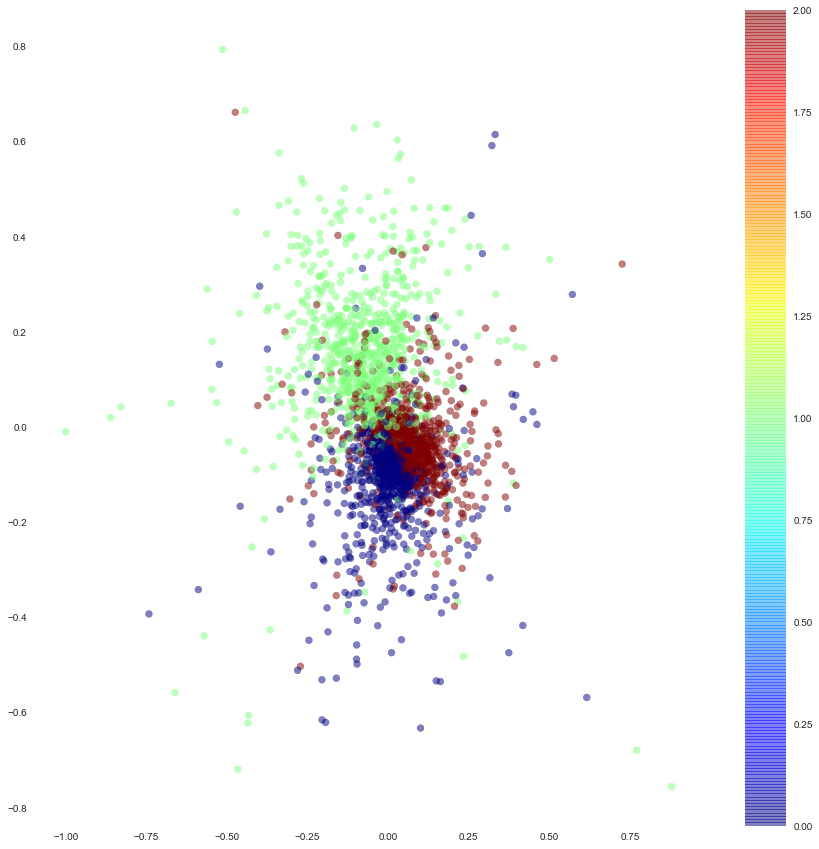

In [169]:
plt.figure(figsize=(15, 15))

plt.scatter(coords_x,coords_y,c=label_num , alpha=0.5, cmap='jet')

plt.colorbar()
plt.show()

In [25]:
tmp_label=list(np.array(conn_label.label.genre.main))

i=0;
node_dict=dict()
for n in conn_graph.node:
    node_dict[n]=i
    i+=1;
conn_graph_rename=nx.relabel_nodes(conn_graph,node_dict)

label_dict={i : tmp_label[i] for i in range(len(conn_graph.node))}
    
nx.set_node_attributes(conn_graph_rename, values=label_dict, name="genre")

In [26]:
# import random
# subnode=random.sample(list(conn_graph.node), 5000)
# sub_graph=conn_graph.subgraph(subnode)
nx.write_gexf(conn_graph, "data/graph_small_HRFP.gexf")

In [180]:
conn_graph_rename.node.data()

NodeDataView({0: {'genre': 'Rock'}, 1: {'genre': 'Rock'}, 2: {'genre': 'Rock'}, 3: {'genre': 'Rock'}, 4: {'genre': 'Rock'}, 5: {'genre': 'Rock'}, 6: {'genre': 'Rock'}, 7: {'genre': 'Rock'}, 8: {'genre': 'Rock'}, 9: {'genre': 'Rock'}, 10: {'genre': 'Rock'}, 11: {'genre': 'Rock'}, 12: {'genre': 'Rock'}, 13: {'genre': 'Rock'}, 14: {'genre': 'Rock'}, 15: {'genre': 'Rock'}, 16: {'genre': 'Electronic'}, 17: {'genre': 'Rock'}, 18: {'genre': 'Rock'}, 19: {'genre': 'Rock'}, 20: {'genre': 'Rock'}, 21: {'genre': 'Rock'}, 22: {'genre': 'Rock'}, 23: {'genre': 'Rock'}, 24: {'genre': 'Rock'}, 25: {'genre': 'Rock'}, 26: {'genre': 'Rock'}, 27: {'genre': 'Rock'}, 28: {'genre': 'Rock'}, 29: {'genre': 'Rock'}, 30: {'genre': 'Rock'}, 31: {'genre': 'Rock'}, 32: {'genre': 'Electronic'}, 33: {'genre': 'Electronic'}, 34: {'genre': 'Electronic'}, 35: {'genre': 'Electronic'}, 36: {'genre': 'Rock'}, 37: {'genre': 'Rock'}, 38: {'genre': 'Rock'}, 39: {'genre': 'Rock'}, 40: {'genre': 'Rock'}, 41: {'genre': 'Rock'}, 

# personal tests

In [28]:
dataSet

feature      chroma_cens                                              \
statistics      kurtosis                                               
number                01        02        03        04            05   
track_id                                                               
182         3.396350e-05  0.000376 -0.000262  0.000034 -9.751009e-05   
255         1.289353e-05  0.000364  0.000096  0.000028  1.080403e-04   
256         5.125153e-06  0.001845 -0.000196 -0.000051 -1.738618e-04   
368         1.387812e-04  0.000492  0.000064  0.000916  1.273574e-03   
459         1.754202e-04 -0.000357 -0.000213 -0.000146 -2.913752e-04   
574         2.744791e-05  0.000253  0.000657 -0.000092  1.066347e-03   
690        -2.795871e-06  0.000294  0.001029  0.000419  7.003378e-04   
777         6.131888e-05 -0.000175  0.000249 -0.000234 -1.162730e-05   
825         3.333279e-05  0.001129  0.000628  0.000231  7.980869e-04   
993         2.310638e-04  0.000700 -0.000182  0.000306  8.685345e-04   
1039        3.730755e-04  0.000765  0.000725  0.000223  5.172150e-04   
1040       -4.866080e-05  0.000154  0.000022  0.000218  2.830968e-05   
1087        1.957593e-04  0.000275  0.000030 -0.000042 -5.031860e-07   
1102        8.317104e-05  0.000136  0.000122 -0.000102 -2.042259e-04   
1270        1.179695e-04  0.000088 -0.000245  0.000024  7.877979e-05   
1417        7.462589e-06 -0.000237 -0.000377 -0.000056 -1.883482e-04   
1427       -4.513628e-06  0.000343  0.000065 -0.000061  4.703169e-05   
1482        1.266757e-04  0.000880 -0.000781 -0.000204 -3.188820e-04   
1706       -1.114257e-04  0.000214 -0.000357  0.000061 -1.660248e-04   
1720        4.115676e-06  0.000025 -0.000012  0.000201  1.436380e-04   
1883       -6.031610e-05 -0.000282  0.000803  0.000244  2.809155e-04   
1891       -4.243093e-06  0.000013  0.000033  0.000041  1.978485e-04   
1930        1.761533e-05 -0.000091 -0.000285 -0.000081 -2.148035e-04   
3492       -1.496031e-04 -0.000411  0.000174  0.000091  1.645150e-04   
3573        9.496619e-06  0.000211  0.000393  0.000648 -1.979946e-05   
3624        6.046472e-05 -0.000091 -0.000049  0.000088 -1.398284e-04   
3720       -2.698742e-05 -0.000217 -0.000330 -0.000104 -2.113396e-04   
3721       -3.744190e-05 -0.000114 -0.000242  0.000075 -1.660627e-04   
3722        2.297477e-04  0.000251  0.000145  0.000099  4.170611e-05   
3724       -6.104938e-05  0.000177  0.000056  0.000138 -1.059148e-04   
...                  ...       ...       ...       ...           ...   
146458     -6.676093e-05 -0.000227 -0.000357 -0.000029  2.899217e-04   
146478      4.086910e-05 -0.000189  0.000312 -0.000018  1.624948e-04   
146481     -4.121537e-05 -0.000026  0.001413  0.000210  5.247516e-04   
146482      1.194617e-04  0.000248 -0.000175  0.001168  4.573414e-04   
146483      1.662501e-04  0.000145  0.000713  0.000380  5.117937e-04   
146879     -1.595417e-04 -0.000508 -0.000656 -0.000294 -4.947543e-04   
147191      5.748619e-06 -0.000091  0.000904 -0.000060 -7.723619e-05   
147409     -2.593846e-05  0.000030  0.000330 -0.000237 -3.916489e-04   
147412     -1.211159e-04  0.000277 -0.000093 -0.000190 -2.445035e-04   
147413      3.015947e-04 -0.000237 -0.000409 -0.000219  9.460887e-05   
147780     -1.176208e-04 -0.000273  0.001185 -0.000139  7.959288e-05   
147815     -7.652560e-05 -0.000423 -0.000055 -0.000142 -3.578299e-04   
147956      6.869926e-05 -0.000280  0.000211 -0.000089 -9.874144e-05   
148246     -1.133334e-05 -0.000053 -0.000177 -0.000165 -2.638484e-04   
148439      7.765325e-07  0.000236 -0.000506  0.000668  4.001552e-05   
148441     -4.798124e-05  0.000026  0.000090  0.000523  9.797288e-05   
148443     -1.993067e-05  0.000108  0.000408  0.000106  6.436736e-04   
148444     -4.087854e-05 -0.000051 -0.000401 -0.000088 -2.526894e-05   
148536     -1.227882e-04  0.000086 -0.000546 -0.000117 -1.899144e-04   
148537     -1.054904e-04 -0.000277 -0.000396 -0.000252  1.785261e-04   
148773      3.100222e-04  0.000932 -0.00

In [29]:
genre_top=genres[genres['parent']==0]
genre_top

,#tracks,parent,title,top_level
genre_id,,,,
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
8,868,0,Old-Time / Historic,8
9,1987,0,Country,9
10,13845,0,Pop,10
12,32923,0,Rock,12
13,730,0,Easy Listening,13


In [30]:
tracks_raw = pd.read_csv('../data/fma_metadata/raw_tracks.csv', index_col=0);
tracks_raw['track_url'][2]

'http://freemusicarchive.org/music/AWOL/AWOL_-_A_Way_Of_Life/Food'

In [31]:
# find specific sample
samples=tracks[tracks['track']['genres']=='[15]']
samples_in_small=samples[samples['set']['subset'] == 'medium']
samples_in_small

album                                            \
         comments         date_created        date_released   
track_id                                                      
397             0  2009-01-07 11:04:01  2007-01-01 00:00:00   
398             0  2008-11-26 02:01:54  2005-07-05 00:00:00   
399             0  2008-11-26 02:01:54  2005-07-05 00:00:00   
400             0  2009-01-07 11:04:01  2007-01-01 00:00:00   
405             0  2008-11-26 02:01:54  2005-07-05 00:00:00   
414             0  2008-11-26 02:01:54  2005-07-05 00:00:00   
550             0  2008-11-26 02:08:19  2009-01-08 00:00:00   
664             0  2008-11-26 02:14:23  2002-10-01 00:00:00   
665             0  2009-01-08 12:05:17  2009-01-08 00:00:00   
878             0  2008-11-26 02:25:39  2009-01-08 00:00:00   
881             0  2008-11-26 02:25:52  2009-01-12 00:00:00   
889             0  2008-11-26 02:25:39  2009-01-08 00:00:00   
1085            0  2008-11-26 02:34:28  2003-01-20 00:00:00   
1086            0  2008-11-26 02:34:28  2003-01-20 00:00:00   
1088            0  2008-11-26 02:34:28  2003-01-20 00:00:00   
1089            0  2008-11-26 02:34:28  2003-01-20 00:00:00   
1121            0  2008-11-26 02:38:27  2009-01-14 00:00:00   
1339            0  2008-11-26 02:48:07  1995-01-01 00:00:00   
1481            0  2008-11-26 02:58:25  2007-01-01 00:00:00   
1483            0  2008-11-26 02:58:25  2007-01-01 00:00:00   
1485            0  2008-11-26 02:58:25  2007-01-01 00:00:00   
1486            0  2008-11-26 02:58:24  2009-01-16 00:00:00   
1634            0  2008-11-26 03:06:22  2006-01-01 00:00:00   
1635            0  2008-11-26 03:06:22  2006-01-01 00:00:00   
1638            0  2008-11-26 03:06:22  2006-01-01 00:00:00   
1640            0  2008-11-26 03:06:22  2006-01-01 00:00:00   
1677            0  2008-11-26 03:07:47  2009-01-23 00:00:00   
1678            0  2008-11-26 03:07:47  2009-01-23 00:00:00   
3268            0  2008-12-04 09:27:11  2008-09-29 00:00:00   
3452            0  2008-12-04 09:27:17  2008-10-14 00:00:00   
...           ...                  ...                  ...   
145800          0  2016-11-03 15:38:21                  NaN   
145801          0  2016-11-03 15:38:21                  NaN   
145802          0  2016-11-03 15:38:21                  NaN   
145803          0  2016-11-03 15:38:21                  NaN   
145804          0  2016-11-03 15:38:21                  NaN   
145805          0  2016-11-03 15:38:21                  NaN   
147919          0  2016-12-16 17:21:41                  NaN   
147920          0  2016-12-16 17:21:41                  NaN   
147921          0  2016-12-16 17:21:41                  NaN   
147922          0  2016-12-16 17:21:41                  NaN   
147923          0  2016-12-16 17:21:41                  NaN   
147924          0  2016-12-16 17:21:41                  NaN   
148960          0  2017-01-05 17:21:03  2017-01-06 00:00:00   
148961          0  2017-01-05 17:21:03  2017-01-06 00:00:00   
148962          0  2017-01-05 17:21:03  2017-01-06 00:00:00   
151026          0  2017-02-06 14:47:39  2016-06-11 00:00:00   
151654          0  2017-02-09 16:56:41  2013-08-09 00:00:00   
152317          0  2017-02-13 15:07:42  2011-09-16 00:00:00   
152318          0  2017-02-13 15:07:42  2011-09-16 00:00:00   
152319          0  2017-02-13 15:07:42  2011-09-16 00:00:00   
152322          0  2017-02-13 15:24:45  2011-11-04 00:00:00   
152323          0  2017-02-13 15:24:45  2011-11-04 00:00:00   
152546          0  2017-02-15 14:56:34                  NaN   
152550          0  2017-02-15 14:56:34                  NaN   
152552          0  2017-02-15 14:56:34                  NaN   
152553          0  2017-02-15 14:56:34                  NaN   
152554          0  2017-02-15 14:56:34                  NaN   
152704          0  2017-02-17 23:53:05  2005-10-16 00:00:00   
152720          0  2017-02-18 00:07:12  2007-12-27 00:00:00   
152721          0  2017-02-18 00:07:12  200

In [32]:
label['label']['genre']['main'].unique()

array(['Rock', 'Electronic'], dtype=object)